# Двойное экспоненциальное сглаживание

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import random
rcParams['figure.figsize'] = 14,6
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

В этом нам поможет разбиение ряда на две составляющие - уровень (level, intercept) 
 и тренд 
 (trend, slope). Уровень, или ожидаемое значение ряда, мы предсказывали при помощи предыдущих методов, а теперь такое же экспоненциальное сглаживание применим к тренду, наивно или не очень полагая, что будущее направление изменения ряда зависит от взвешенных предыдущих изменени

 
 й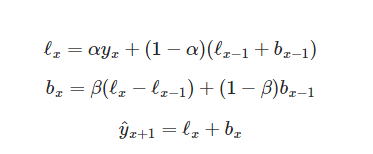.




В результате получаем набор функций. Первая описывает уровень - он, как и прежде, зависит от текущего значения ряда, а второе слагаемое теперь разбивается на предыдущее значение уровня и тренда. Вторая отвечает за тренд - он зависит от изменения уровня на текущем шаге, и от предыдущего значения тренда. Здесь в роли веса в экспоненциальном сглаживании выступает коэффициент 
. Наконец, итоговое предсказание представляет собой сумму модельных значений уровня и тренда.

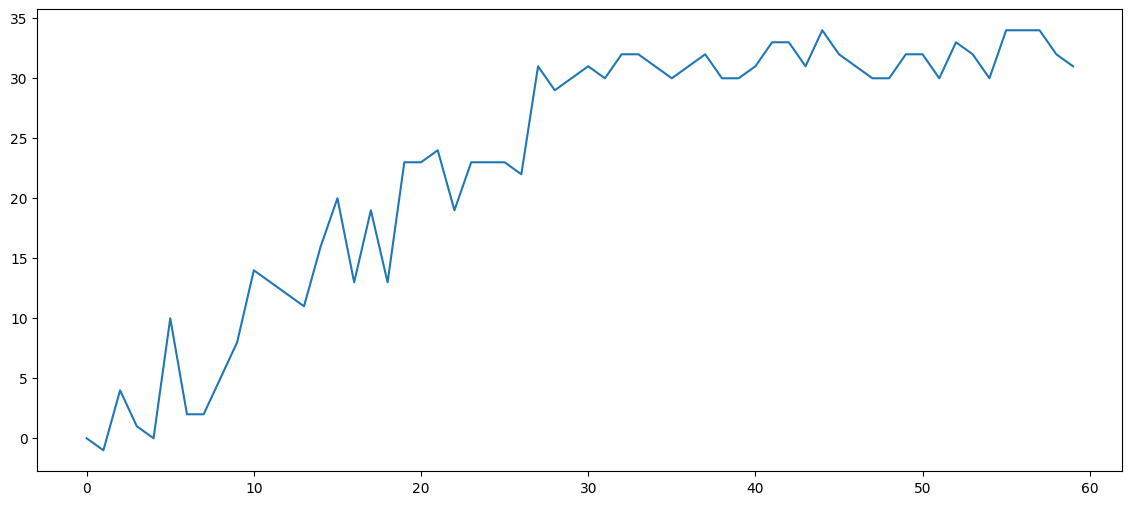

In [2]:
# Создадим "рандомный" тренд данных с восхождением и с выходом на полочку
n_points=30
data_slopped = []
for n in range(n_points):
    data_slopped.append(n+random.randint(-5,+5))
data = np.concatenate ((np.array(data_slopped), np.random.randint(30,35, n_points)))
plt.plot(data)

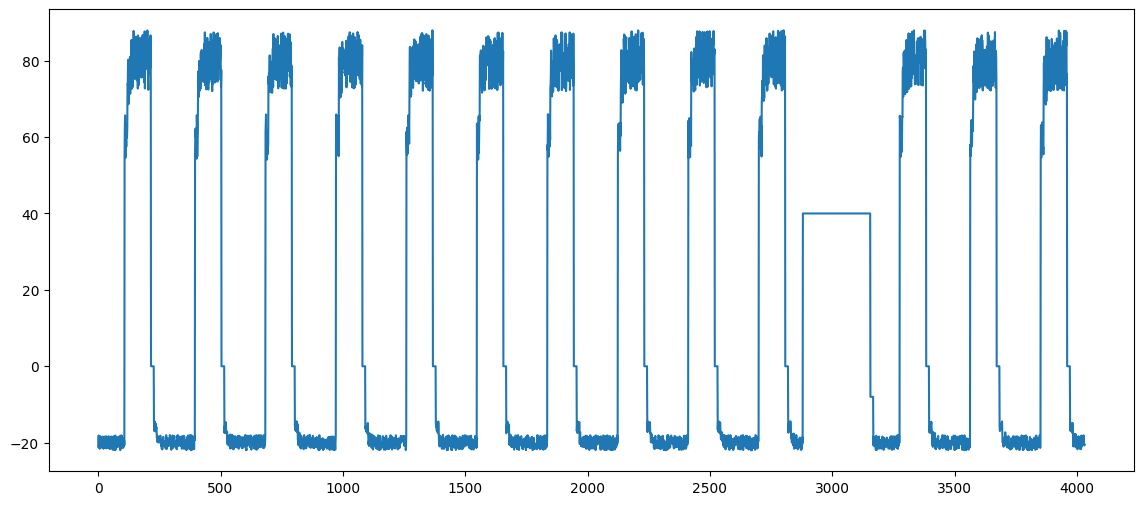

In [3]:
# Второй набор данных : https://github.com/numenta/NAB machine_temperature_system_failure.csv
flatmiddle = pd.read_csv('archive/artificialWithAnomaly/artificialWithAnomaly/art_daily_flatmiddle.csv')
plt.plot(flatmiddle['value'])

In [4]:
# Функция двойного эспонициального сглаживания
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series) + 1):
        if n == 1:
            level = series[0]
            trend = series[1] - series[0]
        if n >= len(series):  # прогнозируем
            value = result[-1]
        else:
            value = series[n]
        last_level = level
        level =  alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

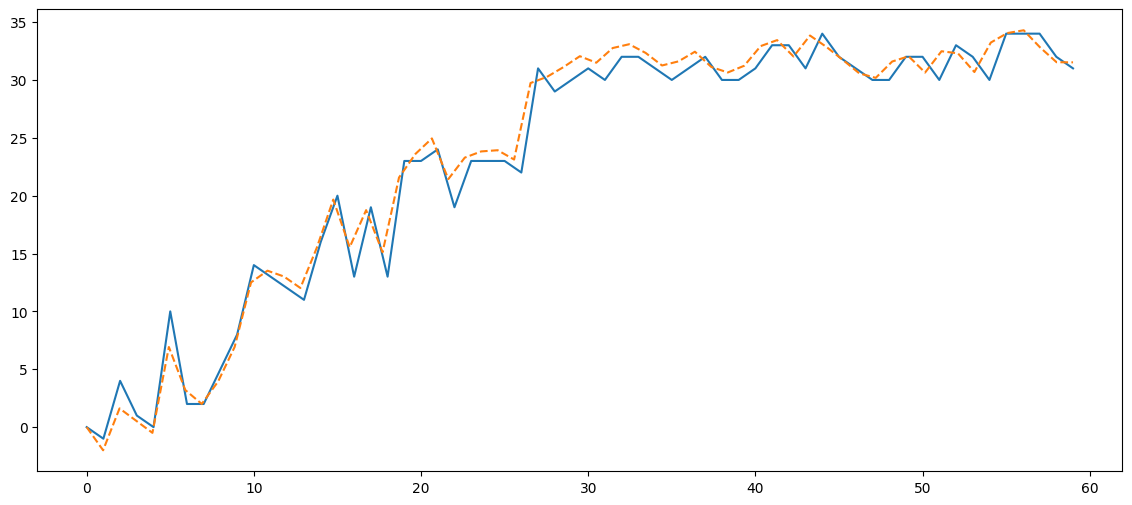

In [5]:
# Посмотрим как выглядит сглаживание на нашем синтетическом датасэте
series = flatmiddle['value']
plt.plot(data)
plt.plot(np.linspace(0,len(data)-1,len(data)+1), double_exponential_smoothing(data, alpha=0.7, beta=0.1), linestyle='--')

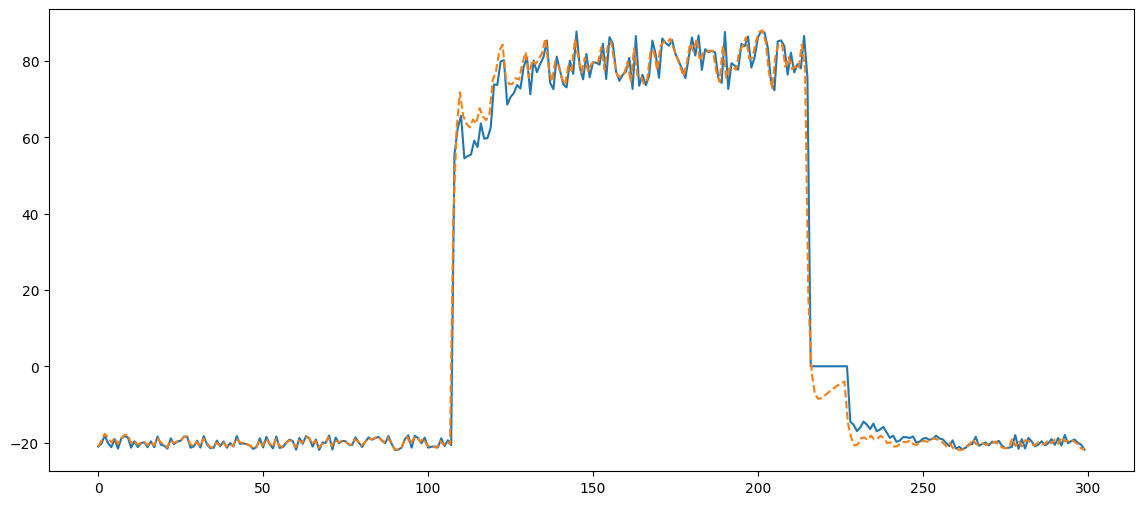

In [6]:
series = flatmiddle.iloc[0:300]['value']
plt.plot(series)
plt.plot(np.linspace(0,len(series)-1,len(series)+1), double_exponential_smoothing(series, alpha=0.7, beta=0.1), linestyle='--')